# Downloading and pre-processing

Importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd       
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

Loading MNIST data

In [2]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
print('Shape of training data',trainX.shape)
print('Shape of test data',testX.shape)
print('Shape of labels',testY.shape)

11501568/11490434 [==============================] - 0s 0us/step
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)
Shape of labels (10000,)


Scaling the data

In [3]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

Transforming the labels to one hot encoding format

In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Label shape', testY.shape)

Label shape (10000, 10)


# Single Layer Network

Creating neural network with one hidden layer

In [5]:
shallowNet = Sequential()
shallowNet.add(Flatten(input_shape=(28,28)))
shallowNet.add(Dense(100, activation="relu"))
shallowNet.add(Dense(10, activation="softmax"))
shallowNet.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

Training

In [6]:
numEpochs = 15
HShallow = shallowNet.fit(trainX, trainY, validation_data=(testX, testY), epochs=numEpochs)

Epoch 1/15
1875/1875 [==============================] - 9s 3ms/step - loss: 0.6672 - accuracy: 0.8296 - val_loss: 0.3625 - val_accuracy: 0.9022
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3404 - accuracy: 0.9044 - val_loss: 0.2963 - val_accuracy: 0.9181
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.9179 - val_loss: 0.2668 - val_accuracy: 0.9267
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2621 - accuracy: 0.9266 - val_loss: 0.2440 - val_accuracy: 0.9329
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2391 - accuracy: 0.9335 - val_loss: 0.2258 - val_accuracy: 0.9354
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2207 - accuracy: 0.9380 - val_loss: 0.2111 - val_accuracy: 0.9399
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2056 - accuracy: 0.9425 - val_loss: 0.1970 - val_accuracy:

Plotting training history

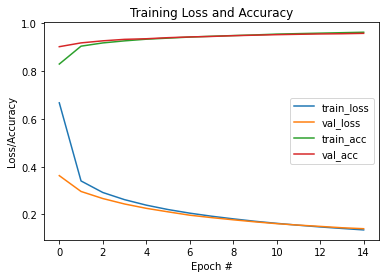

In [7]:
plt.figure()
plt.plot(np.arange(0, numEpochs), HShallow.history["loss"], label="train_loss")
plt.plot(np.arange(0, numEpochs), HShallow.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, numEpochs), HShallow.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, numEpochs), HShallow.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Deep Network (10 Layers)

Creating neural network with ten hidden layer

In [8]:
deepNet = Sequential()
deepNet.add(Flatten(input_shape=(28,28)))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="relu"))
deepNet.add(Dense(10, activation="softmax"))
deepNet.compile(loss="categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"])

Training

In [9]:
HDeep = deepNet.fit(trainX, trainY, validation_data=(testX, testY), epochs=numEpochs)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2972 - accuracy: 0.1333 - val_loss: 2.2686 - val_accuracy: 0.1472
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9621 - accuracy: 0.2239 - val_loss: 1.7565 - val_accuracy: 0.2914
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6814 - accuracy: 0.3318 - val_loss: 1.5717 - val_accuracy: 0.4154
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4967 - accuracy: 0.4432 - val_loss: 1.4205 - val_accuracy: 0.4815
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2329 - accuracy: 0.5462 - val_loss: 1.0813 - val_accuracy: 0.5989
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9879 - accuracy: 0.6377 - val_loss: 0.8854 - val_accuracy: 0.6914
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8580 - accuracy: 0.7056 - val_loss: 0.7875 - val_accuracy:

Plotting training history

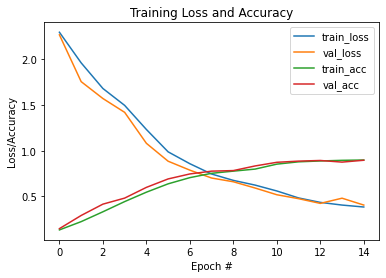

In [10]:
plt.figure()
plt.plot(np.arange(0, numEpochs), HDeep.history["loss"], label="train_loss")
plt.plot(np.arange(0, numEpochs), HDeep.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, numEpochs), HDeep.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, numEpochs), HDeep.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# Comparison of the two Networks

Plot of accuracy while training

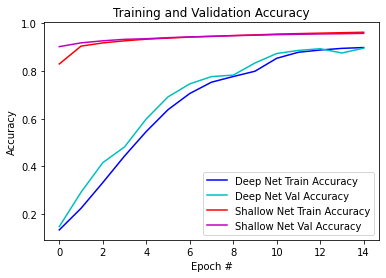

In [11]:
plt.figure()
plt.plot(np.arange(0, numEpochs), HDeep.history["accuracy"], label="Deep Net Train Accuracy", c='b')
plt.plot(np.arange(0, numEpochs), HDeep.history["val_accuracy"], label="Deep Net Val Accuracy", c='c')
plt.plot(np.arange(0, numEpochs), HShallow.history["accuracy"], label="Shallow Net Train Accuracy", c='r')
plt.plot(np.arange(0, numEpochs), HShallow.history["val_accuracy"], label="Shallow Net Val Accuracy", c='m')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Clearly, accuracy of the shallower network is higher than the deeper network for all epochs. Therefore it is the better network out of the two.

# Comparing features generated at layers in deep-net

Extracting features of layers 5,7 and 10

In [12]:
trainLayer5X = tf.keras.Model(deepNet.inputs, deepNet.layers[5].output).predict(trainX)
testLayer5X = tf.keras.Model(deepNet.inputs, deepNet.layers[5].output).predict(testX)
trainLayer7X = tf.keras.Model(deepNet.inputs, deepNet.layers[7].output).predict(trainX)
testLayer7X = tf.keras.Model(deepNet.inputs, deepNet.layers[7].output).predict(testX)
trainLayer10X = tf.keras.Model(deepNet.inputs, deepNet.layers[10].output).predict(trainX)
testLayer10X = tf.keras.Model(deepNet.inputs, deepNet.layers[10].output).predict(testX)

trainLayer5X.shape, trainLayer7X.shape, trainLayer10X.shape

((60000, 10), (60000, 10), (60000, 10))

Importing KNN model and accuracy metric

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Training KNN models and getting predictions

In [14]:
knn = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)

#for layer 5 features
knn.fit(trainLayer5X, trainY)
predLayer5 = knn.predict(testLayer5X)

#for layer 7 features
knn.fit(trainLayer7X, trainY)
predLayer7 = knn.predict(testLayer7X)

#for layer 5 features
knn.fit(trainLayer10X, trainY)
predLayer10 = knn.predict(testLayer10X)

In [15]:
print('Accuracy of KNN model trained on features from 5th layer is', accuracy_score(testY, predLayer5))
print('Accuracy of KNN model trained on features from 7th layer is', accuracy_score(testY, predLayer7))
print('Accuracy of KNN model trained on features from 10th layer is', accuracy_score(testY, predLayer10))

Accuracy of KNN model trained on features from 5th layer is 0.8954
Accuracy of KNN model trained on features from 7th layer is 0.888
Accuracy of KNN model trained on features from 10th layer is 0.8869


As we can see, there is no significant difference between accuracy of KNN model trained on features from layer 5,7 and 10.